In [1]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sb
import pandas as pd
import numpy as np
from pandas.io.json import json_normalize
import json
import pymongo
import pprint
from pymongo import MongoClient
import datetime as dt
import networkx as nx
%matplotlib inline


In [2]:
client = MongoClient('mongodb://localhost:27017')
db = client.yelp
con_check = str(db)
if con_check.find('yelp') != int(-1):
    print('...Connected')
else:
    print('...Connection Failed')

...Connected


In [3]:
user_data = list(db.user.find({},{"user_id":1, "friends":1}).limit(2))
user_df = pd.DataFrame(user_data)

user_df

,_id,friends,user_id
0,57712ea47b99e7221597eee7,"[rpOyqD_893cqmDAtJLbdog, 4U9kSBLuBDU391x6bxU-Y...",18kPq7GPye-YQ3LyKyAZPw
1,57712ea47b99e7221597eee8,"[18kPq7GPye-YQ3LyKyAZPw, rpOyqD_893cqmDAtJLbdo...",fHtTaujcyKvXglE33Z5yIw


In [4]:
users_reviews = list(db.review.find({},{"user_id":1, "friends":1, "business_id":1, "date":1, "stars":1, "_id":0}))

In [5]:
users_reviews_df = pd.DataFrame(users_reviews)
users_reviews = []

In [6]:
users_reviews_df.tail(2)

,business_id,date,stars,user_id
2225211,hhUKRAIkS-vlBtt17DqmNg,2014-10-07,1,xncGcrvha6w4uwSX2tlRIg
2225212,hhUKRAIkS-vlBtt17DqmNg,2015-06-10,5,ehL2F6yf0FSLq01WXEarRA


In [7]:
users_reviews_df[users_reviews_df.user_id == '18kPq7GPye-YQ3LyKyAZPw']

,business_id,date,stars,user_id
464509,zMN8UGd1zDEreT58OCdnyg,2004-10-19,5,18kPq7GPye-YQ3LyKyAZPw


In [8]:
users_reviews_df[users_reviews_df.user_id == 'fHtTaujcyKvXglE33Z5yIw']

,business_id,date,stars,user_id
464508,zMN8UGd1zDEreT58OCdnyg,2004-10-12,5,fHtTaujcyKvXglE33Z5yIw
464727,laMD1HamiWT7pKRXDwjasA,2004-10-12,5,fHtTaujcyKvXglE33Z5yIw


In [9]:
pairs_business_reviews_dates = list()
for user in user_df.user_id:
    user_reviews = users_reviews_df[users_reviews_df.user_id == user]
    
    for review in user_reviews.values:
        user_reviewed_business = review[0]
        user_review_date = review[1]
        user_review_date = dt.datetime.strptime(user_review_date,'%Y-%m-%d').date()
        number_of_reviews = len(users_reviews_df[users_reviews_df.user_id == user])
       
        for user_friends in user_df[user_df.user_id == user].friends:
            for friend in user_friends:
                
                friend_reviews = users_reviews_df[(users_reviews_df.user_id == friend) &
                                              (users_reviews_df.business_id == user_reviewed_business )].values
                
                if len(friend_reviews) == 0:
                    
                    friend_review_date = 'Not reviewed'                    
                    print(user, user_review_date, user_reviewed_business, friend, friend_review_date)
                    pairs_business_reviews_dates.append((user, user_review_date, user_reviewed_business, friend, friend_review_date))
                   
                if len(friend_reviews) > 0:
                    for friend_review in friend_reviews:
                        friend_review_date = friend_review[1]
                        friend_review_date = dt.datetime.strptime(friend_review_date,'%Y-%m-%d').date()
                        print(user, user_review_date, user_reviewed_business, friend, friend_review_date)
                        pairs_business_reviews_dates.append((user, user_review_date, user_reviewed_business, friend, friend_review_date))
                        
    

18kPq7GPye-YQ3LyKyAZPw 2004-10-19 zMN8UGd1zDEreT58OCdnyg rpOyqD_893cqmDAtJLbdog 2004-10-19
18kPq7GPye-YQ3LyKyAZPw 2004-10-19 zMN8UGd1zDEreT58OCdnyg 4U9kSBLuBDU391x6bxU-YA Not reviewed
18kPq7GPye-YQ3LyKyAZPw 2004-10-19 zMN8UGd1zDEreT58OCdnyg fHtTaujcyKvXglE33Z5yIw 2004-10-12
18kPq7GPye-YQ3LyKyAZPw 2004-10-19 zMN8UGd1zDEreT58OCdnyg 8J4IIYcqBlFch8T90N923A Not reviewed
18kPq7GPye-YQ3LyKyAZPw 2004-10-19 zMN8UGd1zDEreT58OCdnyg wy6l_zUo7SN0qrvNRWgySw Not reviewed
18kPq7GPye-YQ3LyKyAZPw 2004-10-19 zMN8UGd1zDEreT58OCdnyg HDQixQ-WZEV0LVPJlIGQeQ Not reviewed
18kPq7GPye-YQ3LyKyAZPw 2004-10-19 zMN8UGd1zDEreT58OCdnyg T4kuUr_iJiywOPdyM7gTHQ Not reviewed
18kPq7GPye-YQ3LyKyAZPw 2004-10-19 zMN8UGd1zDEreT58OCdnyg z_5D4XEIlGAPjG3Os9ix5A Not reviewed
18kPq7GPye-YQ3LyKyAZPw 2004-10-19 zMN8UGd1zDEreT58OCdnyg i63u3SdbrLsP4FxiSKP0Zw Not reviewed
18kPq7GPye-YQ3LyKyAZPw 2004-10-19 zMN8UGd1zDEreT58OCdnyg pnrGw4ciBXJ6U5QB2m0F5g Not reviewed
18kPq7GPye-YQ3LyKyAZPw 2004-10-19 zMN8UGd1zDEreT58OCdnyg ytjCBxosVSqCOQ62c

In [25]:
pairs_business_reviews_dates_df = pd.DataFrame(pairs_business_reviews_dates)
pairs_business_reviews_dates_df.columns = ['user_id', 'user_review_date', 'user_reviewed_business_id', 'friend_id',
                                                   'friend_review_date']
pairs_business_reviews_dates_df


,user_id,user_review_date,user_reviewed_business_id,friend_id,friend_review_date
0,18kPq7GPye-YQ3LyKyAZPw,2004-10-19,zMN8UGd1zDEreT58OCdnyg,rpOyqD_893cqmDAtJLbdog,2004-10-19
1,18kPq7GPye-YQ3LyKyAZPw,2004-10-19,zMN8UGd1zDEreT58OCdnyg,4U9kSBLuBDU391x6bxU-YA,Not reviewed
2,18kPq7GPye-YQ3LyKyAZPw,2004-10-19,zMN8UGd1zDEreT58OCdnyg,fHtTaujcyKvXglE33Z5yIw,2004-10-12
3,18kPq7GPye-YQ3LyKyAZPw,2004-10-19,zMN8UGd1zDEreT58OCdnyg,8J4IIYcqBlFch8T90N923A,Not reviewed
4,18kPq7GPye-YQ3LyKyAZPw,2004-10-19,zMN8UGd1zDEreT58OCdnyg,wy6l_zUo7SN0qrvNRWgySw,Not reviewed
5,18kPq7GPye-YQ3LyKyAZPw,2004-10-19,zMN8UGd1zDEreT58OCdnyg,HDQixQ-WZEV0LVPJlIGQeQ,Not reviewed
6,18kPq7GPye-YQ3LyKyAZPw,2004-10-19,zMN8UGd1zDEreT58OCdnyg,T4kuUr_iJiywOPdyM7gTHQ,Not reviewed
7,18kPq7GPye-YQ3LyKyAZPw,2004-10-19,zMN8UGd1zDEreT58OCdnyg,z_5D4XEIlGAPjG3Os9ix5A,Not reviewed
8,18kPq7GPye-YQ3LyKyAZPw,2004-10-19,zMN8UGd1zDEreT58OCdnyg,i63u3SdbrLsP4FxiSKP0Zw,Not reviewed
9,18kPq7GPye-YQ3LyKyAZPw,2004-10-19,zMN8UGd1zDEreT58OCdnyg,pnrGw4ciBXJ6U5QB2m0F5g,Not reviewed


In [12]:
pairs = []
individual_user = 'None'
for ind_user in pairs_business_reviews_dates_df.user_id:
    if individual_user != ind_user:
        individual_user = ind_user
        for ind_friend in pairs_business_reviews_dates_df[pairs_business_reviews_dates_df.user_id == individual_user].friend_id:
            individual_friend = ind_friend
            customized_df = pairs_business_reviews_dates_df[(pairs_business_reviews_dates_df.user_id == individual_user) &
                                (pairs_business_reviews_dates_df.friend_id == individual_friend) ]
            user_id = customized_df[(pairs_business_reviews_dates_df.user_id == individual_user)].user_id.values

            friend_id = customized_df[(pairs_business_reviews_dates_df.user_id == individual_user)].friend_id.values
            user_review_date =  customized_df[(pairs_business_reviews_dates_df.user_id == individual_user) & 
                                (pairs_business_reviews_dates_df.friend_id == individual_friend) ].user_review_date.values
            friend_review_date = customized_df[(pairs_business_reviews_dates_df.user_id == individual_user) & 
                                (pairs_business_reviews_dates_df.friend_id == individual_friend) ].friend_review_date.values
            
            observed_user = 'None'
            observed_friend = 'None'
            for user in user_id:
                if observed_user != user:
                    observed_user = user
                    weight = 0
            for friend in friend_id:
                if observed_friend != friend:
                    observed_friend  = friend
                    
                    user_friend_pair_cumulative_weight = list()
                    for user_date in user_review_date:
                        user_date
                    for friend_date in friend_review_date:
                        
                        if (friend_date != 'Not reviewed'):
                            if (friend_date >= user_date) & (friend_date <= user_date + dt.timedelta(60)):
                                weight = 1 + weight
                        elif friend_date == 'Not reviewed':
                             weight = 0
                        
                        user_friend_pair_cumulative_weight.append(weight)
                        weight = 0  
                        user_friend_engagement_weight = sum(user_friend_pair_cumulative_weight)
                        
            pairs.append((observed_friend,observed_user, user_friend_engagement_weight))                    
            print(observed_friend,observed_user, user_friend_engagement_weight)
    
            
            #print(individual_user,individual_friend )     
        
    elif individual_user != ind_user:
        continue
                                 

C:\Users\PC-VAIO\Anaconda3\lib\site-packages\ipykernel\__main__.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\Users\PC-VAIO\Anaconda3\lib\site-packages\ipykernel\__main__.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\Users\PC-VAIO\Anaconda3\lib\site-packages\ipykernel\__main__.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\Users\PC-VAIO\Anaconda3\lib\site-packages\ipykernel\__main__.py:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


rpOyqD_893cqmDAtJLbdog 18kPq7GPye-YQ3LyKyAZPw 1
4U9kSBLuBDU391x6bxU-YA 18kPq7GPye-YQ3LyKyAZPw 0
fHtTaujcyKvXglE33Z5yIw 18kPq7GPye-YQ3LyKyAZPw 0
8J4IIYcqBlFch8T90N923A 18kPq7GPye-YQ3LyKyAZPw 0
wy6l_zUo7SN0qrvNRWgySw 18kPq7GPye-YQ3LyKyAZPw 0
HDQixQ-WZEV0LVPJlIGQeQ 18kPq7GPye-YQ3LyKyAZPw 0
T4kuUr_iJiywOPdyM7gTHQ 18kPq7GPye-YQ3LyKyAZPw 0
z_5D4XEIlGAPjG3Os9ix5A 18kPq7GPye-YQ3LyKyAZPw 0
i63u3SdbrLsP4FxiSKP0Zw 18kPq7GPye-YQ3LyKyAZPw 0
pnrGw4ciBXJ6U5QB2m0F5g 18kPq7GPye-YQ3LyKyAZPw 0
ytjCBxosVSqCOQ62c4KAxg 18kPq7GPye-YQ3LyKyAZPw 0
r5uiIxwJ-I-oHBkNY2Ha3Q 18kPq7GPye-YQ3LyKyAZPw 0
niWoSKswEbooJC_M7HMbGw 18kPq7GPye-YQ3LyKyAZPw 0
kwoxiKMyoYjB1wTCYAjYRg 18kPq7GPye-YQ3LyKyAZPw 0
9A8OuP6XwLwnNb9ov3_Ncw 18kPq7GPye-YQ3LyKyAZPw 0
27MmRg8LfbZXNEHkEnKSdA 18kPq7GPye-YQ3LyKyAZPw 0
Bn4sJUTtKFZQt0FKHF2Adw 18kPq7GPye-YQ3LyKyAZPw 0
uguXfIEpI65jSCH5MgUDgA 18kPq7GPye-YQ3LyKyAZPw 0
6VZNGc2h2Bn-uyuEXgOt5g 18kPq7GPye-YQ3LyKyAZPw 0
AZ8CTtwr-4sGM2kZqF6qig 18kPq7GPye-YQ3LyKyAZPw 0
S742m-AuQicMSLDdErrLZQ 18kPq7GPye-YQ3LyK

In [13]:
pairs

[('rpOyqD_893cqmDAtJLbdog', '18kPq7GPye-YQ3LyKyAZPw', 1),
 ('4U9kSBLuBDU391x6bxU-YA', '18kPq7GPye-YQ3LyKyAZPw', 0),
 ('fHtTaujcyKvXglE33Z5yIw', '18kPq7GPye-YQ3LyKyAZPw', 0),
 ('8J4IIYcqBlFch8T90N923A', '18kPq7GPye-YQ3LyKyAZPw', 0),
 ('wy6l_zUo7SN0qrvNRWgySw', '18kPq7GPye-YQ3LyKyAZPw', 0),
 ('HDQixQ-WZEV0LVPJlIGQeQ', '18kPq7GPye-YQ3LyKyAZPw', 0),
 ('T4kuUr_iJiywOPdyM7gTHQ', '18kPq7GPye-YQ3LyKyAZPw', 0),
 ('z_5D4XEIlGAPjG3Os9ix5A', '18kPq7GPye-YQ3LyKyAZPw', 0),
 ('i63u3SdbrLsP4FxiSKP0Zw', '18kPq7GPye-YQ3LyKyAZPw', 0),
 ('pnrGw4ciBXJ6U5QB2m0F5g', '18kPq7GPye-YQ3LyKyAZPw', 0),
 ('ytjCBxosVSqCOQ62c4KAxg', '18kPq7GPye-YQ3LyKyAZPw', 0),
 ('r5uiIxwJ-I-oHBkNY2Ha3Q', '18kPq7GPye-YQ3LyKyAZPw', 0),
 ('niWoSKswEbooJC_M7HMbGw', '18kPq7GPye-YQ3LyKyAZPw', 0),
 ('kwoxiKMyoYjB1wTCYAjYRg', '18kPq7GPye-YQ3LyKyAZPw', 0),
 ('9A8OuP6XwLwnNb9ov3_Ncw', '18kPq7GPye-YQ3LyKyAZPw', 0),
 ('27MmRg8LfbZXNEHkEnKSdA', '18kPq7GPye-YQ3LyKyAZPw', 0),
 ('Bn4sJUTtKFZQt0FKHF2Adw', '18kPq7GPye-YQ3LyKyAZPw', 0),
 ('uguXfIEpI65

In [14]:
users_network = nx.Graph()

In [15]:
for pair in pairs: 
    users_network.add_edge(pair[0],pair[1], weight = int(pair[2]))

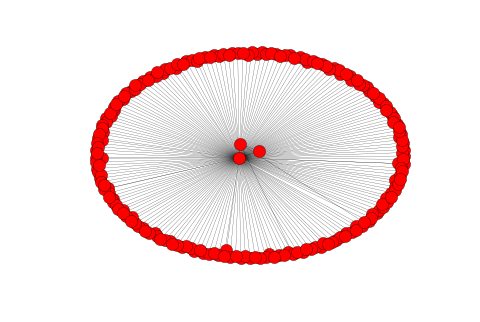

In [24]:
nx.draw(users_network, pos=nx.spring_layout(users_network),node_size=150, width=0.2)

In [62]:
user_data = list(db.user.find({},{"user_id":1, "friends":1}).limit(5))
user_df = pd.DataFrame(user_data)

user_df

,_id,friends,user_id
0,57712ea47b99e7221597eee7,"[rpOyqD_893cqmDAtJLbdog, 4U9kSBLuBDU391x6bxU-Y...",18kPq7GPye-YQ3LyKyAZPw
1,57712ea47b99e7221597eee8,"[18kPq7GPye-YQ3LyKyAZPw, rpOyqD_893cqmDAtJLbdo...",fHtTaujcyKvXglE33Z5yIw
2,57712ea47b99e7221597eee9,"[rpOyqD_893cqmDAtJLbdog, HDQixQ-WZEV0LVPJlIGQe...",SIBCL7HBkrP4llolm4SC2A
3,57712ea47b99e7221597eeea,"[18kPq7GPye-YQ3LyKyAZPw, rpOyqD_893cqmDAtJLbdo...",4U9kSBLuBDU391x6bxU-YA
4,57712ea47b99e7221597eeeb,"[i63u3SdbrLsP4FxiSKP0Zw, lGrDfsaWl9IDUcEeUWyn6A]",WPOKvkacSKHx_bIG1alFiA


In [26]:

pairs = []
index = 0
weight = 0
for user in user_df.user_id:
    for friend in user_df.friends[index]:
        pairs.append((friend, user, weight))
        weight = weight + 1
    index = index + 1
             
pairs


[('rpOyqD_893cqmDAtJLbdog', '18kPq7GPye-YQ3LyKyAZPw', 0),
 ('4U9kSBLuBDU391x6bxU-YA', '18kPq7GPye-YQ3LyKyAZPw', 1),
 ('fHtTaujcyKvXglE33Z5yIw', '18kPq7GPye-YQ3LyKyAZPw', 2),
 ('8J4IIYcqBlFch8T90N923A', '18kPq7GPye-YQ3LyKyAZPw', 3),
 ('wy6l_zUo7SN0qrvNRWgySw', '18kPq7GPye-YQ3LyKyAZPw', 4),
 ('HDQixQ-WZEV0LVPJlIGQeQ', '18kPq7GPye-YQ3LyKyAZPw', 5),
 ('T4kuUr_iJiywOPdyM7gTHQ', '18kPq7GPye-YQ3LyKyAZPw', 6),
 ('z_5D4XEIlGAPjG3Os9ix5A', '18kPq7GPye-YQ3LyKyAZPw', 7),
 ('i63u3SdbrLsP4FxiSKP0Zw', '18kPq7GPye-YQ3LyKyAZPw', 8),
 ('pnrGw4ciBXJ6U5QB2m0F5g', '18kPq7GPye-YQ3LyKyAZPw', 9),
 ('ytjCBxosVSqCOQ62c4KAxg', '18kPq7GPye-YQ3LyKyAZPw', 10),
 ('r5uiIxwJ-I-oHBkNY2Ha3Q', '18kPq7GPye-YQ3LyKyAZPw', 11),
 ('niWoSKswEbooJC_M7HMbGw', '18kPq7GPye-YQ3LyKyAZPw', 12),
 ('kwoxiKMyoYjB1wTCYAjYRg', '18kPq7GPye-YQ3LyKyAZPw', 13),
 ('9A8OuP6XwLwnNb9ov3_Ncw', '18kPq7GPye-YQ3LyKyAZPw', 14),
 ('27MmRg8LfbZXNEHkEnKSdA', '18kPq7GPye-YQ3LyKyAZPw', 15),
 ('Bn4sJUTtKFZQt0FKHF2Adw', '18kPq7GPye-YQ3LyKyAZPw', 16),
 ('uguX

In [64]:
users_network = nx.Graph()

In [72]:
for pair in pairs: 
    users_network.add_edge(pair[0],pair[1], weight = int(pair[2]))

In [75]:
len(users_network)

548

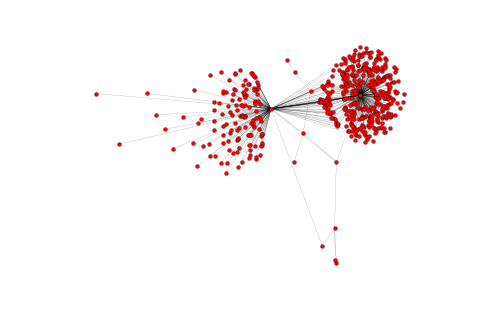

In [76]:
nx.draw(users_network, pos=nx.spring_layout(users_network),node_size=15, width=0.1)

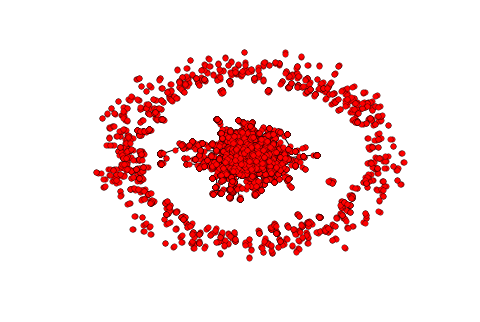

In [76]:
nx.draw(users_network, pos=nx.spring_layout(users_network),node_size=30, width=1)

In [9]:
user_data = list(db.user.find({},{"user_id":1, "friends":1}).limit(500))
user_df = pd.DataFrame(user_data)
user_df.tail()

,_id,friends,user_id
495,57712ea47b99e7221597f0d6,"[H1bAWX8TSemWl57VBj-jYA, gKGEuQU-BZbS0YaPEhvI-...",qDLkq0kTzUcKFDC7pRdb2g
496,57712ea47b99e7221597f0d7,"[23zYCcnqfru5jdxnTqjgDg, nPmkFfAbzyORBif3cjSjy...",7cIc52lToGmKu7Hpp6rPdg
497,57712ea47b99e7221597f0d8,[],qYLuXIBkrudpmuKrGPvEng
498,57712ea47b99e7221597f0d9,"[LE2_bN_WtAkzQSnMd-4Fhw, uzQ8KSFfn_87ZQs-uE0Ag...",RXX-DegPPWxUcQTTVpRgxg
499,57712ea47b99e7221597f0da,[],t7webn56DEvcC34fYBRagw


In [10]:
pairs = []
index = 0
for user in user_df.user_id:
    for friend in user_df.friends[index]:
        pairs.append((friend, user))
    index = index + 1
pairs[-10:]

[('yQ_B0Jz_JhJWGmzYQLRLTQ', '7cIc52lToGmKu7Hpp6rPdg'),
 ('Lpfv7K14JqiFbRDnbWqnjQ', '7cIc52lToGmKu7Hpp6rPdg'),
 ('GK7q6F7qF62Pg81XtI0V1g', '7cIc52lToGmKu7Hpp6rPdg'),
 ('LC6Qmz9Pi_-d6EV-RFx5lg', '7cIc52lToGmKu7Hpp6rPdg'),
 ('G1wHLJov77v5v1ctnB1d_g', '7cIc52lToGmKu7Hpp6rPdg'),
 ('wh8Bvda268I9IKjPkDoRoA', '7cIc52lToGmKu7Hpp6rPdg'),
 ('LE2_bN_WtAkzQSnMd-4Fhw', 'RXX-DegPPWxUcQTTVpRgxg'),
 ('uzQ8KSFfn_87ZQs-uE0AgQ', 'RXX-DegPPWxUcQTTVpRgxg'),
 ('nDMsIFrROmRNw1O-IwsD6g', 'RXX-DegPPWxUcQTTVpRgxg'),
 ('QXy3WnQjSk4ks2MKZHspZQ', 'RXX-DegPPWxUcQTTVpRgxg')]

In [11]:
users_network = nx.Graph()
users_network.add_edges_from(pairs)
len(users_network)

5281

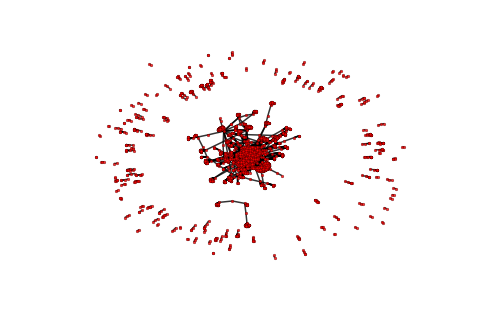

In [15]:
nx.draw(users_network, pos=nx.spring_layout(users_network),node_size=8, width=1.5, alpha=0.8)